In [32]:
import pandas as pd
import random 
import numpy as np
import re
from scipy.sparse import hstack

In [33]:
from pre_processamento import pre_processamento, text_preprocess, textcolumns_junct, stemming                   

In [34]:
from sklearn.model_selection import train_test_split
import nltk
from nltk import word_tokenize #tokenizador
from nltk.corpus import stopwords   #stopword

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\angel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\angel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
from xgboost import XGBRegressor

In [36]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score

In [37]:
train = pd.read_csv(r"C:\Users\angel\Desktop\bootcamp\train.tsv", sep='\t')
test = pd.read_csv(r"C:\Users\angel\Desktop\bootcamp\test.tsv", sep='\t')

In [38]:
train,test = pre_processamento(train,test)

#   Análise estatística

In [39]:
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,27,Men,Tops,T-shirts,6.0,2018.0
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,15,Electronics,Computers & Tablets,Components & Parts,3.0,2018.0
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,14,Women,Tops & Blouses,Blouse,10.0,2018.0
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,1,Home,Home Décor,Home Décor Accents,3.0,2018.0
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,13,Women,Jewelry,Necklaces,5.0,2018.0


In [40]:
train.describe()

,item_condition_id,price,shipping,stock,datetime_month,datetime_year
count,1.481661e+06,1.481661e+06,1.481661e+06,1.481661e+06,1.474770e+06,1474770.0
mean,1.907322e+00,2.675329e+01,4.473257e-01,1.178550e+01,6.517894e+00,2018.0
std,9.031759e-01,3.859198e+01,4.972178e-01,1.056099e+01,3.194489e+00,0.0
min,1.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2018.0
25%,1.000000e+00,1.000000e+01,0.000000e+00,4.000000e+00,4.000000e+00,2018.0
50%,2.000000e+00,1.700000e+01,0.000000e+00,9.000000e+00,7.000000e+00,2018.0
75%,3.000000e+00,2.900000e+01,1.000000e+00,1.700000e+01,9.000000e+00,2018.0
max,5.000000e+00,2.009000e+03,1.000000e+00,9.500000e+01,1.200000e+01,2018.0


In [41]:
train.isnull().sum()  #necessário valair forma de tratar os valores nulos.

name                      0
item_condition_id         0
category_name          6314
brand_name           632336
price                     0
shipping                  0
item_description          4
stock                     0
gen_cat                   0
sub1_cat                  0
sub2_cat                  0
datetime_month         6891
datetime_year          6891
dtype: int64

In [42]:
train.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'item_condition_id'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'shipping'}>,
        <AxesSubplot:title={'center':'stock'}>],
       [<AxesSubplot:title={'center':'datetime_month'}>,
        <AxesSubplot:title={'center':'datetime_year'}>]], dtype=object)

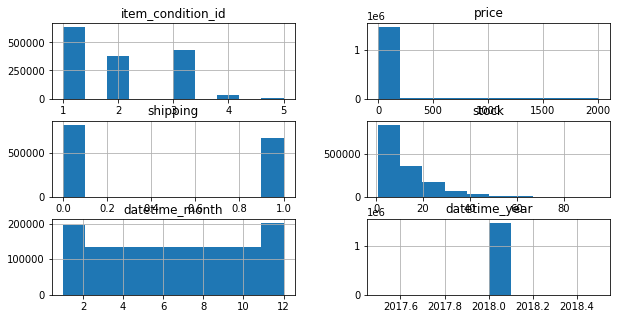

In [43]:
train.hist(figsize=(10,5))

In [44]:
X = train.drop("price", axis = 1)
y = train["price"]

#   Split

In [45]:
#Separação em treino e teste para começarmos as transformaçõs, protegendo nossos dados de validação de possíveis vazamentos. 

Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.2, random_state=10) #Divisão em 80/20

<AxesSubplot:>

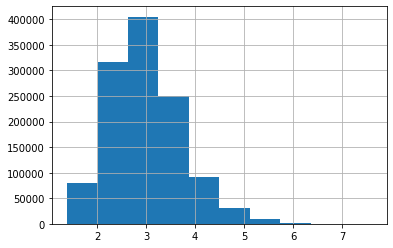

In [46]:
#Normalizando, com log, o target (price), foi realizado de forma separada para nao terem dados vazados.

ytrain =  np.log1p(ytrain)
yval =  np.log1p(yval)
ytrain.hist()

In [47]:
Xtrain.head()

,name,item_condition_id,category_name,brand_name,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
760902,VICTORIAS SECRET Bra,3,Women/Underwear/Bras,Victoria's Secret,0,VS 32A nude VS Push up Bombshell Plunge Good c...,3,Women,Underwear,Bras,12.0,2018.0
1241133,"4 Scott Westerfeld Uglies, Pretty, Extra",3,Vintage & Collectibles/Book/Fiction,NaN,1,This is a lot of 4 Scott Westerfeld books. 3 P...,16,Vintage & Collectibles,Book,Fiction,11.0,2018.0
473273,Kylie Jenner Lipstick,1,Beauty/Makeup/Lips,NaN,1,Heir... never used!!! Metal matte,2,Beauty,Makeup,Lips,10.0,2018.0
495608,Suave Men Body Wash,1,Other/Daily & Travel items/Personal Care,Suave,0,This listing is for 3!!! (Not 5 as pictured). ...,10,Other,Daily & Travel items,Personal Care,11.0,2018.0
107994,New Men's Dr. martens 10 12,1,Men/Shoes/Boots,NaN,0,Men's 10 or women's 12,13,Men,Shoes,Boots,10.0,2018.0


In [48]:
Xval.head()

,name,item_condition_id,category_name,brand_name,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
20170,Swiss Army knife,1,Sports & Outdoors/Outdoors/Hiking & Camping,NaN,1,New in original box. Never used.,13,Sports & Outdoors,Outdoors,Hiking & Camping,4.0,2018.0
155565,Dove Soap Mega LOT Assorted,1,Other/Daily & Travel items/Personal Care,Dove,0,(9) 4ct (36 bars total) Dove Soap (5) Febreze ...,1,Other,Daily & Travel items,Personal Care,6.0,2018.0
142735,"LOWEST PRICE, HIGHEST QUALITY BLENDER",1,Beauty/Tools & Accessories/Makeup Brushes & Tools,NaN,1,STOP THROWING YOUR MAKEUP AWAY ! ! * ~ * Newes...,7,Beauty,Tools & Accessories,Makeup Brushes & Tools,1.0,2018.0
709876,Gold aluminum fidget spinner,1,Kids/Toys/Games,NaN,1,Aluminum fidget spinner: Brand new . Comes in ...,13,Kids,Toys,Games,5.0,2018.0
723286,Duffle bag,3,Women/Women's Handbags/Totes & Shoppers,NaN,0,Used duffle bag Perfect for young girls for tr...,43,Women,Women's Handbags,Totes & Shoppers,2.0,2018.0


#   Pré-processamento treino

In [49]:
Xtrain["name"] = Xtrain["name"].apply(lambda x: text_preprocess(x))

In [50]:
Xtrain["item_description"] = Xtrain["item_description"].astype(str)

In [51]:
Xtrain["item_description"] = Xtrain["item_description"].apply(lambda x: text_preprocess(x))

KeyboardInterrupt: 

In [ ]:
Xtrain.head()

,name,item_condition_id,brand_name,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
760902,victorias secret bra,3,Victoria's Secret,0,vs 32a nude vs push up bombshell plunge good c...,3,Women,Underwear,Bras,12.0,2018.0
1241133,4 scott westerfeld uglies pretty extra,3,NaN,1,this is a lot of 4 scott westerfeld books. 3 p...,16,Vintage & Collectibles,Book,Fiction,11.0,2018.0
473273,kylie jenner lipstick,1,NaN,1,heir... never used metal matte,2,Beauty,Makeup,Lips,10.0,2018.0
495608,suave men body wash,1,Suave,0,this listing is for 3 not 5 as pictured. 12oz ...,10,Other,Daily & Travel items,Personal Care,11.0,2018.0
107994,new men is dr. martens 10 12,1,NaN,0,men is 10 or women is 12,13,Men,Shoes,Boots,10.0,2018.0


In [ ]:
vec = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_features=50000) #vetorização, com stop word. 

vce_xtrain_name = vec.fit_transform(Xtrain["name"])
vce_xtrain_descrip = vec.fit_transform(Xtrain["item_description"])

In [ ]:
vce_xtrain_name

<1185328x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 6378594 stored elements in Compressed Sparse Row format>

In [ ]:
vce_xtrain_descrip

<1185328x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 24028483 stored elements in Compressed Sparse Row format>

In [ ]:
ohe = OneHotEncoder(handle_unknown="ignore")

#aplicação dummy nas colunas categóricas.

ohe_condition = ohe.fit_transform(Xtrain[["item_condition_id",   
                                         "shipping",
                                         "brand_name",
                                         "gen_cat",
                                         "sub1_cat",
                                         "sub2_cat", 
                                         "datetime_month"]])

In [ ]:
ohe_condition

<1185328x5507 sparse matrix of type '<class 'numpy.float64'>'
	with 8297296 stored elements in Compressed Sparse Row format>

In [ ]:
#juntando cada matrix gerada por cada pré-processamento

x_train = hstack([
                 (vce_xtrain_name),
                 (vce_xtrain_descrip),
                 (ohe_condition),
                                     ]) 

In [ ]:
x_train

<1185328x105507 sparse matrix of type '<class 'numpy.float64'>'
	with 38704373 stored elements in Compressed Sparse Row format>

#   Pré-processamento teste

In [ ]:
Xval["name"] = Xval["name"].apply(lambda x: text_preprocess(x))

In [ ]:
Xval["item_description"] = Xval["item_description"].astype(str)

In [ ]:
Xval["item_description"] = Xval["item_description"].apply(lambda x: text_preprocess(x))

In [ ]:
vce_xval_name = vec.transform(Xval["name"])
vce_xval_descrip = vec.transform(Xval["item_description"])

In [ ]:
ohe_condition_val = ohe.transform(Xval[["item_condition_id",   
                                         "shipping",
                                         "brand_name",
                                         "gen_cat",
                                         "sub1_cat",
                                         "sub2_cat", 
                                         "datetime_month"]])

In [ ]:
#juntando cada matrix gerada por cada pré-processamento

x_val = hstack([
                 (vce_xval_name),
                 (vce_xval_descrip),
                 (ohe_condition_val),
                                     ]) 

In [ ]:
x_val

<296333x105507 sparse matrix of type '<class 'numpy.float64'>'
	with 9470957 stored elements in Compressed Sparse Row format>

# Modelo

In [ ]:
xgb = XGBRegressor(gpu_id = "0",
                   tree_method="gpu_hist",
                   random_state = 10
                   )

In [ ]:
model = xgb.fit(x_train, ytrain)

In [ ]:
ypredict = model.predict(x_val)

In [ ]:
ypredict = np.expm1(ypredict)
yval =np.expm1(yval)

In [ ]:
print('MAE: %2f' % mean_absolute_error(yval,ypredict))
print('RMSE: %2f' % (mean_squared_error(yval,ypredict)))

MAE: 13.003209
RMSE: 1114.510487
